In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


Wczytanie danych

In [2]:
df = pd.read_csv('kaggle/Diabetes Classification.csv')

In [3]:
df = df.drop(columns=['Unnamed: 0'])

Podział na zbiór treningowy i testowy

In [4]:
print(df.columns)

Index(['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN',
       'Diagnosis'],
      dtype='object')


In [5]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

Skalowanie danych

In [6]:
le = LabelEncoder()
X = X.apply(le.fit_transform)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model MLP

In [9]:
clf = MLPClassifier(random_state=42)
clf.fit(X_train, y_train)

MLPClassifier(random_state=42)

Predykcja

In [10]:
y_pred = clf.predict(X_test)

Ocena modelu

In [11]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[533  71]
 [109 314]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       604
           1       0.82      0.74      0.78       423

    accuracy                           0.82      1027
   macro avg       0.82      0.81      0.82      1027
weighted avg       0.82      0.82      0.82      1027



Walidacja krzyzowa

In [12]:
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)

print(f'Cross-validation scores: {cross_val_scores}')
print(f'Mean cross-validation accuracy: {cross_val_scores.mean():.2f}')

Cross-validation scores: [0.82338611 0.82338611 0.81485993 0.8136419  0.81607795]
Mean cross-validation accuracy: 0.82


Macierz pomyłek

In [13]:
cm = confusion_matrix(y_test, clf.predict(X_test))

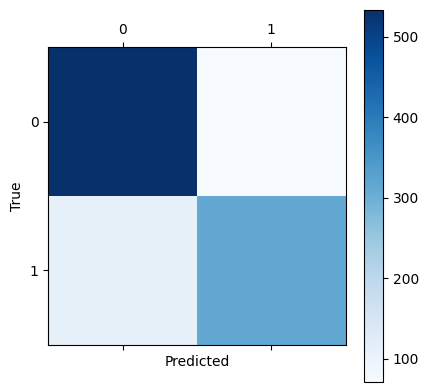

In [14]:
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

krzywa ROC

In [15]:
y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

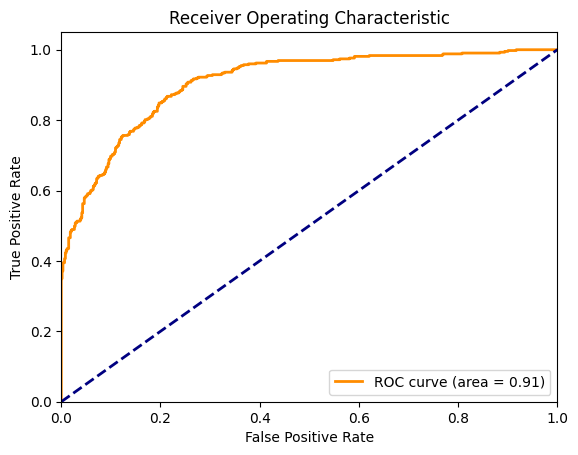

In [16]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Krzywa uczenia

In [17]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

In [18]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

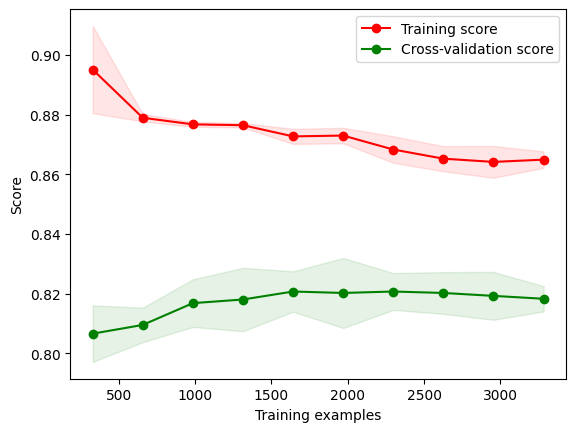

In [19]:
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()